In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [6]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X, y = iris.data, iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
print("\n\n\n",X_train)
print("\n\n\n",X_test)
print("\n\n\n",y_train)
print("\n\n\n",y_test)




 [[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.5 2.5 4.  1.3]
 [4.4 2.9 1.4 0.2]
 [4.3 3.

In [19]:
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=42)
clf

AdaBoostClassifier(learning_rate=1, random_state=42)

In [21]:
cv_scores =cross_val_score(clf,X_train,y_train,cv=5)
cv_scores

array([0.95238095, 0.9047619 , 0.9047619 , 0.95238095, 0.9047619 ])

In [23]:
print("Cross-Validation Score:\n",cv_scores)
print("Mean Cross-Validation Score\n",cv_scores.mean())

Cross-Validation Score:
 [0.95238095 0.9047619  0.9047619  0.95238095 0.9047619 ]
Mean Cross-Validation Score
 0.9238095238095239


In [24]:
clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [25]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 1.0


In [26]:
n_estimators_values = [10, 50, 100, 500, 1000, 5000]
cv_scores_mean = []

In [31]:
for n_estimators in n_estimators_values:
    clf = AdaBoostClassifier(n_estimators= n_estimators, learning_rate=1, random_state=0)
    cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)
    cv_scores_mean.append(cv_scores.mean())

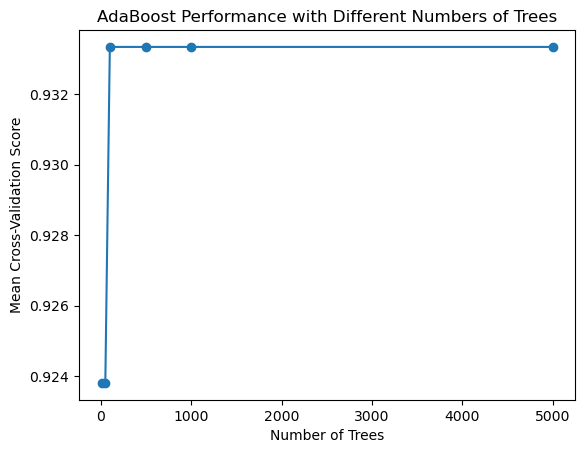

In [32]:
plt.plot(n_estimators_values, cv_scores_mean, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Cross-Validation Score')
plt.title("AdaBoost Performance with Different Numbers of Trees")
plt.show()

In [38]:
learning_rates = np.linspace(0.1, 2, 20)
cv_scores_mean = []
for learning_rate in learning_rates:
    clf = AdaBoostClassifier(n_estimators=50, learning_rate=learning_rate, random_state=0)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores_mean.append(cv_scores.mean())

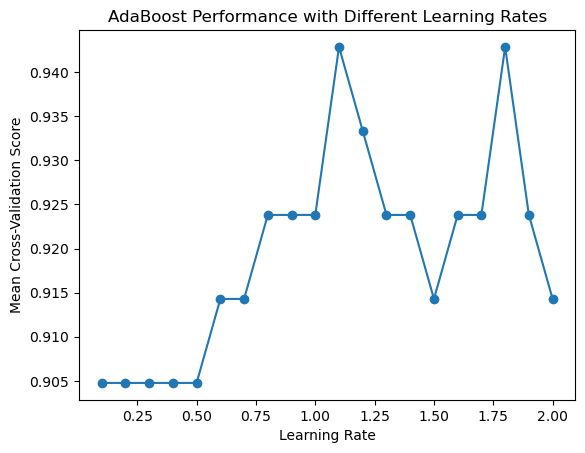

In [36]:
plt.plot(learning_rates, cv_scores_mean, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Cross-Validation Score')
plt.title('AdaBoost Performance with Different Learning Rates')
plt.show()